# EDA Vehicle Fuel Economy

In [1]:
import pandas as pd

# Cargar el dataset proporcionado
file_path = 'Vehicle Fuel Economy Data.csv'
vehicle_data = pd.read_csv(file_path)

# Visualizar las primeras filas para entender la estructura del dataset
vehicle_data.head(), vehicle_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46186 entries, 0 to 46185
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46186 non-null  int64  
 1   Manufacturer     46186 non-null  object 
 2   Model            46176 non-null  object 
 3   barrels08        46169 non-null  float64
 4   barrelsA08       46169 non-null  float64
 5   charge240        46169 non-null  float64
 6   city08           46169 non-null  float64
 7   city08U          46169 non-null  float64
 8   cityA08          46169 non-null  float64
 9   cityA08U         46169 non-null  float64
 10  cityCD           46169 non-null  float64
 11  cityE            46169 non-null  float64
 12  cityUF           46169 non-null  float64
 13  co2              46169 non-null  float64
 14  co2A             46169 non-null  float64
 15  co2TailpipeAGpm  46169 non-null  float64
 16  co2TailpipeGpm   46169 non-null  float64
 17  comb08      

C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\2981310006.py:5: DtypeWarning: Columns (73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_data = pd.read_csv(file_path)


(   Year Manufacturer                          Model  barrels08  barrelsA08  \
 0  2017          BMW                       M6 Coupe  17.500588         0.0   
 1  2017          BMW                   X3 sDrive28i  12.396250         0.0   
 2  2016     Infiniti                 Q50S Red Sport  13.523182         0.0   
 3  2017         MINI  John Cooper Works Convertible  11.018889         0.0   
 4  2017          Kia                      Sedona SX  14.167143         0.0   
 
    charge240  city08  city08U  cityA08  cityA08U  ...  mfrCode  c240Dscr  \
 0        0.0    15.0     14.0      0.0       0.0  ...      BMX       NaN   
 1        0.0    21.0     21.0      0.0       0.0  ...      BMX       NaN   
 2        0.0    20.0     19.0      0.0       0.0  ...      NSX       NaN   
 3        0.0    24.0     23.0      0.0       0.0  ...      BMX       NaN   
 4        0.0    18.0     18.0      0.0       0.0  ...      KMX       NaN   
 
    charge240b  c240bDscr   createdOn  modifiedOn  startStop

In [2]:
vehicle_data.shape

(46186, 82)

In [3]:
vehicle_data.head()

,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0
2,2016,Infiniti,Q50S Red Sport,13.523182,0.0,0.0,20.0,19.0,0.0,0.0,...,NSX,NaN,0.0,NaN,04-04-2016,26-09-2016,N,0.0,0.0,0.0
3,2017,MINI,John Cooper Works Convertible,11.018889,0.0,0.0,24.0,23.0,0.0,0.0,...,BMX,NaN,0.0,NaN,12-04-2016,16-09-2016,Y,0.0,0.0,0.0
4,2017,Kia,Sedona SX,14.167143,0.0,0.0,18.0,18.0,0.0,0.0,...,KMX,NaN,0.0,NaN,12-04-2016,02-12-2016,N,0.0,0.0,0.0


# Valores faltantes

In [4]:
# Análisis de valores faltantes
missing_values = vehicle_data.isnull().sum()
missing_percentage = (missing_values / len(vehicle_data)) * 100

# Crear un DataFrame con el resumen
missing_summary = pd.DataFrame({
    'Column': missing_values.index,
    'MissingCount': missing_values.values,
    'MissingPercentage': missing_percentage.values
}).sort_values(by='MissingPercentage', ascending=False)

# Mostrar las columnas con más del 50% de valores faltantes
print("Columnas con más del 50% de valores faltantes:")
print(missing_summary[missing_summary['MissingPercentage'] > 50])


Columnas con más del 50% de valores faltantes:
        Column  MissingCount  MissingPercentage
75   c240bDscr         46059          99.725025
73    c240Dscr         46053          99.712034
67    sCharger         45199          97.862989
70      rangeA         44544          96.444810
69   fuelType2         44539          96.433984
71     evMotor         44312          95.942493
64     guzzler         43551          94.294808
68     atvType         41800          90.503616
66    tCharger         37655          81.529035
78   startStop         31829          68.914823
65  trans_dscr         31795          68.841207
72     mfrCode         30986          67.089594


# Outliers

In [5]:
# Función para identificar outliers numéricos
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar outliers en todas las columnas numéricas
numeric_columns = vehicle_data.select_dtypes(include=['float64', 'int64']).columns
outliers_dict = {col: detect_outliers_iqr(vehicle_data, col) for col in numeric_columns}

# Mostrar ejemplos de outliers detectados
for col, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f"Outliers en '{col}':")
        print(outliers[[col]].head())


Outliers en 'barrels08':
     barrels08
20    0.081600
139  27.046364
148  27.046364
160   5.721346
187   0.076800
Outliers en 'barrelsA08':
    barrelsA08
35         3.0
53         4.0
70         4.0
71         4.0
72         4.0
Outliers en 'charge240':
     charge240
20        12.0
187        4.0
188        3.0
204        2.0
232        2.0
Outliers en 'city08':
     city08
20     97.0
119    32.0
160    54.0
175    40.0
186    31.0
Outliers en 'city08U':
     city08U
20      97.0
160     53.0
187    119.0
239    150.0
257     50.0
Outliers en 'cityA08':
    cityA08
35     15.0
53     12.0
70     11.0
71     11.0
72     12.0
Outliers en 'cityA08U':
    cityA08U
35      15.0
53      11.0
70      11.0
71      11.0
72      11.0
Outliers en 'cityCD':
       cityCD
1361      1.0
12839     5.0
20047     5.0
Outliers en 'cityE':
     cityE
20    35.0
187   28.0
188   62.0
204   45.0
232   33.0
Outliers en 'co2':
        co2
717   784.0
1105  840.0
1582  979.0
1897  840.0
2980  847.0
Outlie

Resumen inicial del dataset:
1. Estructura del dataset
Total de filas: 46,186
Total de columnas: 82
Tipos de datos:
Numéricas (float64 e int64): 58 columnas
Categóricas (object): 24 columnas
2. Aspectos destacados
Algunas columnas contienen valores faltantes o nulos en una gran proporción, como:
c240Dscr (133 valores no nulos)
sCharger (987 valores no nulos)
fuelType2 (1,647 valores no nulos)
Varias columnas parecen irrelevantes para el análisis de eficiencia del combustible, como:
createdOn y modifiedOn (fechas relacionadas con la creación y modificación del registro).

3. Valores faltantes y nulos
- Varias columnas tienen un alto porcentaje de valores faltantes:
    c240Dscr (99.7% faltantes)
    c240bDscr (99.7% faltantes)
    fuelType2 (96.4% faltantes)
    sCharger (97.8% faltantes)
    Estas columnas parecen irrelevantes debido a la gran cantidad de datos faltantes y pueden ser eliminadas.


Recomendaciones para optimización
- Columnas a eliminar:

Columnas con demasiados valores faltantes:
c240Dscr, c240bDscr, sCharger, fuelType2, rangeA, evMotor.
Columnas redundantes o irrelevantes:
createdOn, modifiedOn (datos de creación/modificación del registro).
trans_dscr (descripción redundante de transmisión).
eng_dscr (descripción detallada, pero con alto porcentaje de nulos).

-Columnas a mantener:

Year, Manufacturer, Model, city08, highway08 (esenciales para analizar la eficiencia del combustible).
fuelType, fuelCost08, co2 (relevantes para evaluar emisiones y costos).

In [6]:
# Definir las columnas a eliminar
columns_to_remove = [
    'c240Dscr', 'c240bDscr', 'sCharger', 'fuelType2', 'rangeA', 'evMotor', 
    'createdOn', 'modifiedOn', 'trans_dscr', 'eng_dscr'
]

# Crear un nuevo dataset sin las columnas especificadas
optimized_vehicle_data = vehicle_data.drop(columns=columns_to_remove)

# Guardar el dataset optimizado en un archivo CSV
output_path = "Vehicle_Fuel_Economy_Optimized.csv"
optimized_vehicle_data.to_csv(output_path, index=False)

output_path


'Vehicle_Fuel_Economy_Optimized.csv'

In [9]:

# Cargar el dataset proporcionado
file_path = 'Vehicle_Fuel_Economy_Optimized.csv'
vehicle_dataOp = pd.read_csv(file_path)

# Visualizar las primeras filas para entender la estructura del dataset
vehicle_dataOp.head(), vehicle_dataOp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46186 entries, 0 to 46185
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46186 non-null  int64  
 1   Manufacturer     46186 non-null  object 
 2   Model            46176 non-null  object 
 3   barrels08        46169 non-null  float64
 4   barrelsA08       46169 non-null  float64
 5   charge240        46169 non-null  float64
 6   city08           46169 non-null  float64
 7   city08U          46169 non-null  float64
 8   cityA08          46169 non-null  float64
 9   cityA08U         46169 non-null  float64
 10  cityCD           46169 non-null  float64
 11  cityE            46169 non-null  float64
 12  cityUF           46169 non-null  float64
 13  co2              46169 non-null  float64
 14  co2A             46169 non-null  float64
 15  co2TailpipeAGpm  46169 non-null  float64
 16  co2TailpipeGpm   46169 non-null  float64
 17  comb08      

(   Year Manufacturer                          Model  barrels08  barrelsA08  \
 0  2017          BMW                       M6 Coupe  17.500588         0.0   
 1  2017          BMW                   X3 sDrive28i  12.396250         0.0   
 2  2016     Infiniti                 Q50S Red Sport  13.523182         0.0   
 3  2017         MINI  John Cooper Works Convertible  11.018889         0.0   
 4  2017          Kia                      Sedona SX  14.167143         0.0   
 
    charge240  city08  city08U  cityA08  cityA08U  ...  youSaveSpend  guzzler  \
 0        0.0    15.0     14.0      0.0       0.0  ...       -9750.0        G   
 1        0.0    21.0     21.0      0.0       0.0  ...       -4000.0      NaN   
 2        0.0    20.0     19.0      0.0       0.0  ...       -5250.0      NaN   
 3        0.0    24.0     23.0      0.0       0.0  ...       -2500.0      NaN   
 4        0.0    18.0     18.0      0.0       0.0  ...       -3250.0      NaN   
 
    tCharger  atvType  mfrCode  char

In [10]:
vehicle_dataOp

,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,youSaveSpend,guzzler,tCharger,atvType,mfrCode,charge240b,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,-9750.0,G,T,NaN,BMX,0.0,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,-4000.0,NaN,T,NaN,BMX,0.0,Y,0.0,0.0,0.0
2,2016,Infiniti,Q50S Red Sport,13.523182,0.0,0.0,20.0,19.0,0.0,0.0,...,-5250.0,NaN,T,NaN,NSX,0.0,N,0.0,0.0,0.0
3,2017,MINI,John Cooper Works Convertible,11.018889,0.0,0.0,24.0,23.0,0.0,0.0,...,-2500.0,NaN,T,NaN,BMX,0.0,Y,0.0,0.0,0.0
4,2017,Kia,Sedona SX,14.167143,0.0,0.0,18.0,18.0,0.0,0.0,...,-3250.0,NaN,NaN,NaN,KMX,0.0,N,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46181,1993,Plymouth,Sundance/Duster,12.935217,0.0,0.0,21.0,0.0,0.0,0.0,...,-2000.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
46182,1993,Pontiac,Grand Am,14.167143,0.0,0.0,18.0,0.0,0.0,0.0,...,-3250.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
46183,1993,Saab,900,14.167143,0.0,0.0,18.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46184,1993,Subaru,Legacy,13.523182,0.0,0.0,19.0,0.0,0.0,0.0,...,-2500.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


# Analisis Estadistico 
1. Relación entre Manufacturer y Model

In [11]:
# Conteo de modelos por fabricante
manufacturer_model_count = optimized_vehicle_data.groupby('Manufacturer')['Model'].nunique().reset_index()
manufacturer_model_count.rename(columns={'Model': 'UniqueModels'}, inplace=True)

# Mostrar las marcas con más modelos únicos
manufacturer_model_count = manufacturer_model_count.sort_values(by='UniqueModels', ascending=False)
print("Número de modelos únicos por fabricante:")
print(manufacturer_model_count.head(10))


Número de modelos únicos por fabricante:
      Manufacturer  UniqueModels
11             BMW           422
84   Mercedes-Benz           421
24       Chevrolet           269
41            Ford           263
103        Porsche           191
42             GMC           170
6             Audi           159
132         Toyota           152
90          Nissan           133
31           Dodge           122


2. Relación entre Manufacturer y city08 (Eficiencia promedio por fabricante)

In [12]:
# Calcular la eficiencia promedio por fabricante
manufacturer_efficiency = optimized_vehicle_data.groupby('Manufacturer')['city08'].mean().reset_index()
manufacturer_efficiency = manufacturer_efficiency.sort_values(by='city08', ascending=False)
print("Eficiencia promedio (city08) por fabricante:")
print(manufacturer_efficiency.head(10))


Eficiencia promedio (city08) por fabricante:
        Manufacturer      city08
61             Kandi  127.000000
76             Lucid  123.066667
130            Tesla  106.708955
101         Polestar   85.333333
21   CODA Automotive   77.000000
110           Rivian   72.750000
141            smart   68.421053
13               BYD   67.714286
10    Azure Dynamics   62.000000
74         Lordstown   49.000000


3. Relación entre city08 y highway08 (Correlación y dispersión)

Correlación entre city08 y highway08:
            city08  highway08
city08     1.00000    0.95694
highway08  0.95694    1.00000


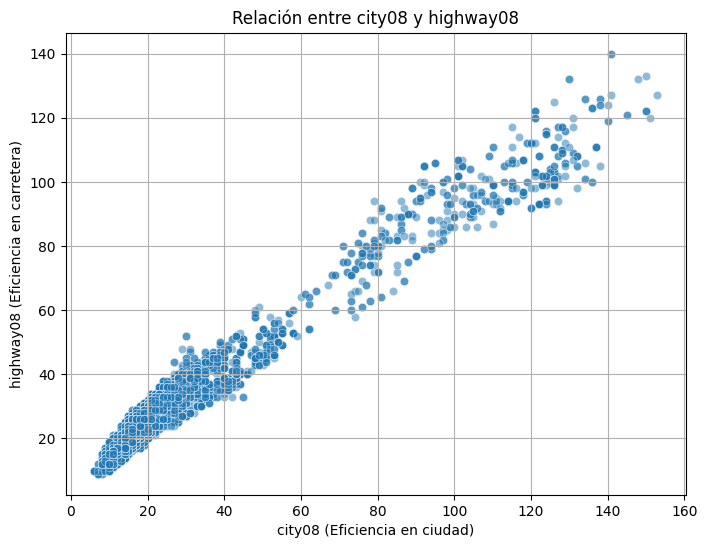

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la correlación
correlation = optimized_vehicle_data[['city08', 'highway08']].corr()
print("Correlación entre city08 y highway08:")
print(correlation)

# Graficar dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=optimized_vehicle_data, x='city08', y='highway08', alpha=0.5)
plt.title("Relación entre city08 y highway08")
plt.xlabel("city08 (Eficiencia en ciudad)")
plt.ylabel("highway08 (Eficiencia en carretera)")
plt.grid(True)
plt.show()


4. Relación entre Manufacturer y highway08 (Boxplot)

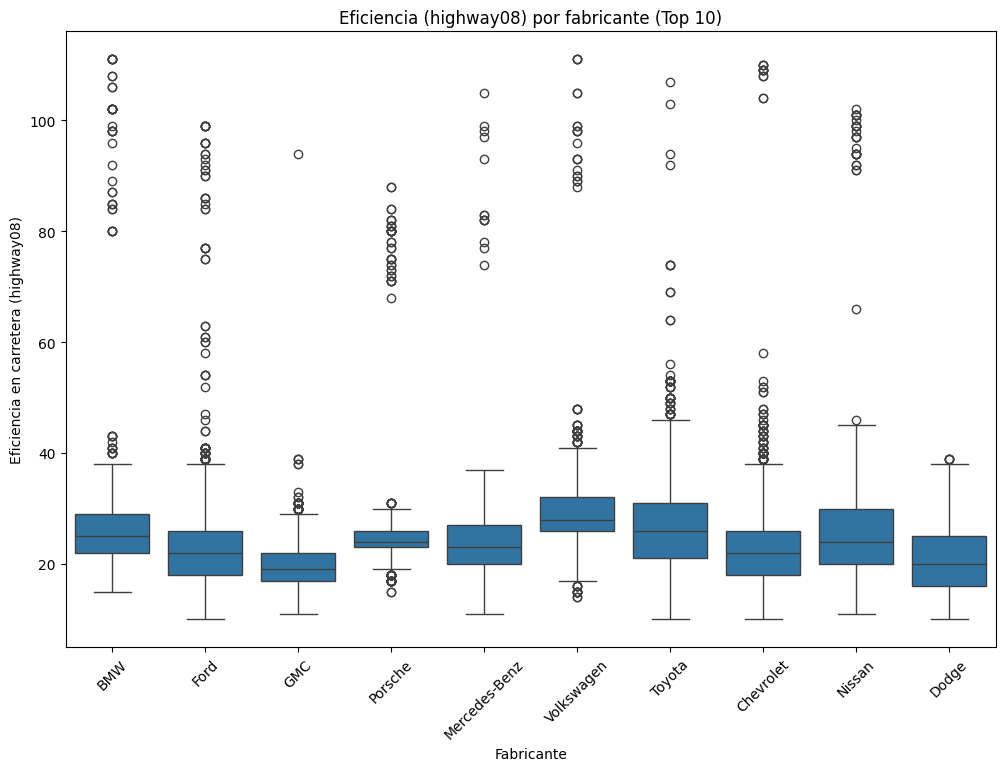

In [14]:
# Boxplot para highway08 por fabricante
plt.figure(figsize=(12, 8))
top_manufacturers = optimized_vehicle_data['Manufacturer'].value_counts().head(10).index
sns.boxplot(data=optimized_vehicle_data[optimized_vehicle_data['Manufacturer'].isin(top_manufacturers)], 
            x='Manufacturer', y='highway08')
plt.title("Eficiencia (highway08) por fabricante (Top 10)")
plt.xlabel("Fabricante")
plt.ylabel("Eficiencia en carretera (highway08)")
plt.xticks(rotation=45)
plt.show()


5. Relación entre cilindrada (displ) y eficiencia (city08, highway08)

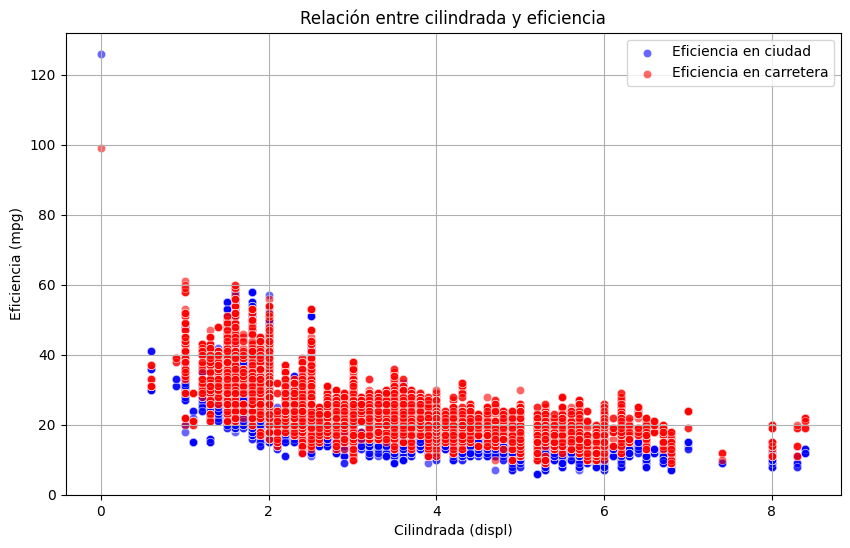

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión: cilindrada vs eficiencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=optimized_vehicle_data, x='displ', y='city08', alpha=0.6, color='blue', label='Eficiencia en ciudad')
sns.scatterplot(data=optimized_vehicle_data, x='displ', y='highway08', alpha=0.6, color='red', label='Eficiencia en carretera')
plt.title("Relación entre cilindrada y eficiencia")
plt.xlabel("Cilindrada (displ)")
plt.ylabel("Eficiencia (mpg)")
plt.legend()
plt.grid(True)
plt.show()


6. Relación entre cilindros (cylinders) y emisiones de CO2 (co2)

C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\274522175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=optimized_vehicle_data, x='cylinders', y='co2', palette='coolwarm')


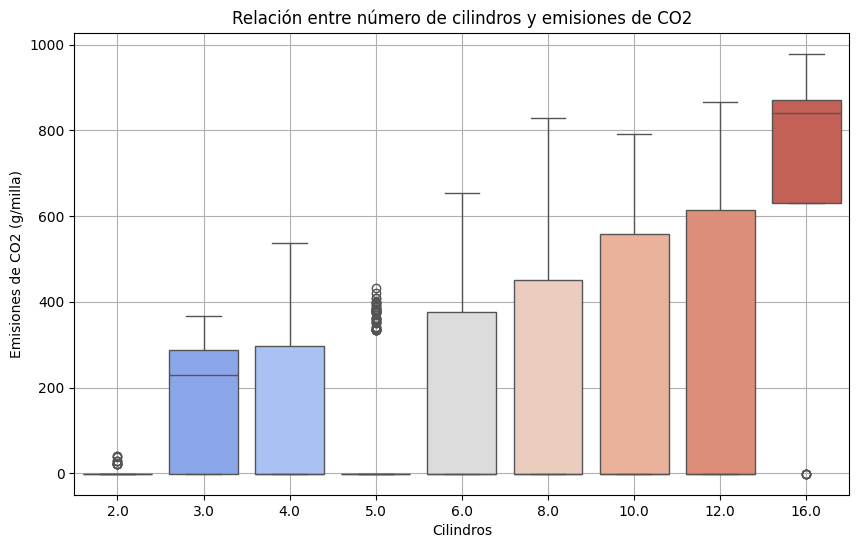

In [16]:
# Gráfico de caja: cilindros vs emisiones
plt.figure(figsize=(10, 6))
sns.boxplot(data=optimized_vehicle_data, x='cylinders', y='co2', palette='coolwarm')
plt.title("Relación entre número de cilindros y emisiones de CO2")
plt.xlabel("Cilindros")
plt.ylabel("Emisiones de CO2 (g/milla)")
plt.grid(True)
plt.show()


7. Cambios en la eficiencia a lo largo del tiempo (Year)

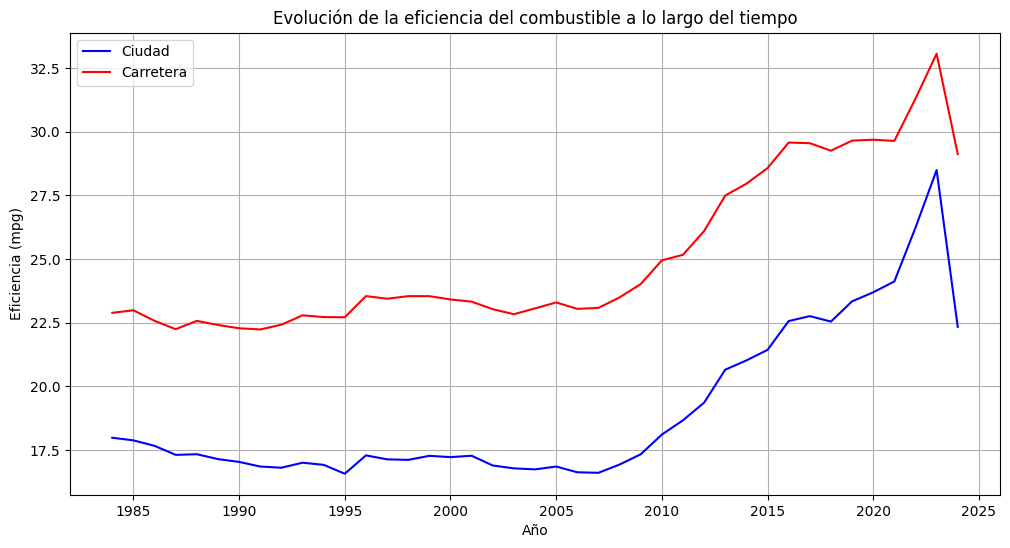

In [17]:
# Gráfico de línea: eficiencia promedio por año
efficiency_by_year = optimized_vehicle_data.groupby('Year')[['city08', 'highway08']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=efficiency_by_year, x='Year', y='city08', label='Ciudad', color='blue')
sns.lineplot(data=efficiency_by_year, x='Year', y='highway08', label='Carretera', color='red')
plt.title("Evolución de la eficiencia del combustible a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Eficiencia (mpg)")
plt.legend()
plt.grid(True)
plt.show()


8. Emisiones y costos (co2 vs fuelCost08)

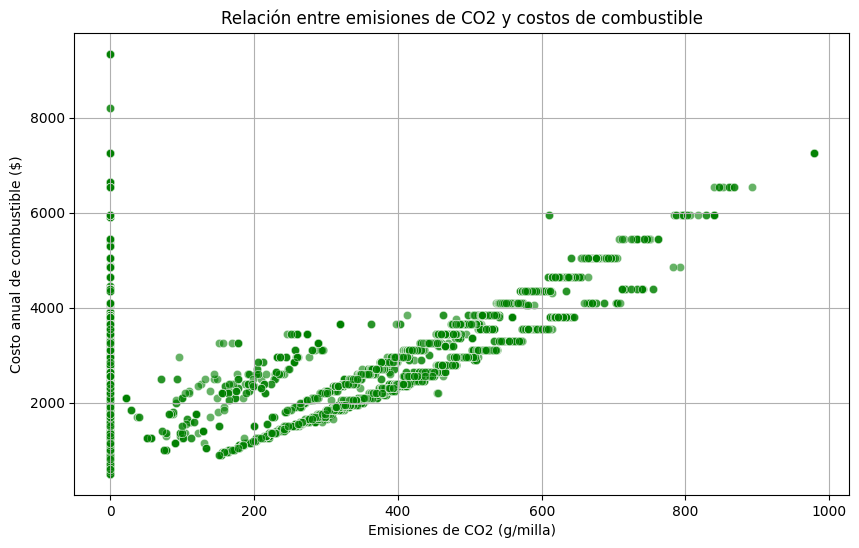

In [18]:
# Gráfico de dispersión: emisiones vs costos de combustible
plt.figure(figsize=(10, 6))
sns.scatterplot(data=optimized_vehicle_data, x='co2', y='fuelCost08', alpha=0.6, color='green')
plt.title("Relación entre emisiones de CO2 y costos de combustible")
plt.xlabel("Emisiones de CO2 (g/milla)")
plt.ylabel("Costo anual de combustible ($)")
plt.grid(True)
plt.show()


9. Distribución de emisiones por tipo de combustible (fuelType)

C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\1316336757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=optimized_vehicle_data, x='fuelType', y='co2', palette='viridis')


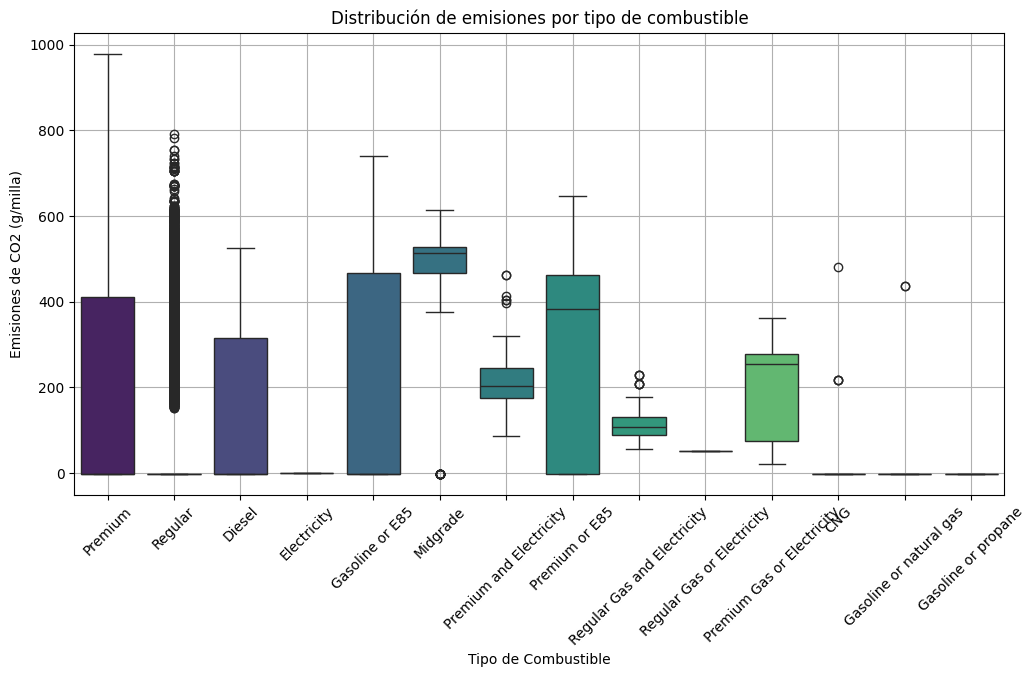

In [19]:
# Gráfico de caja: tipo de combustible vs emisiones
plt.figure(figsize=(12, 6))
sns.boxplot(data=optimized_vehicle_data, x='fuelType', y='co2', palette='viridis')
plt.title("Distribución de emisiones por tipo de combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Emisiones de CO2 (g/milla)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


10. Comparación entre clases de vehículos (VClass)

C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\3402482032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=efficiency_by_vclass, x='VClass', y='city08', palette='mako')


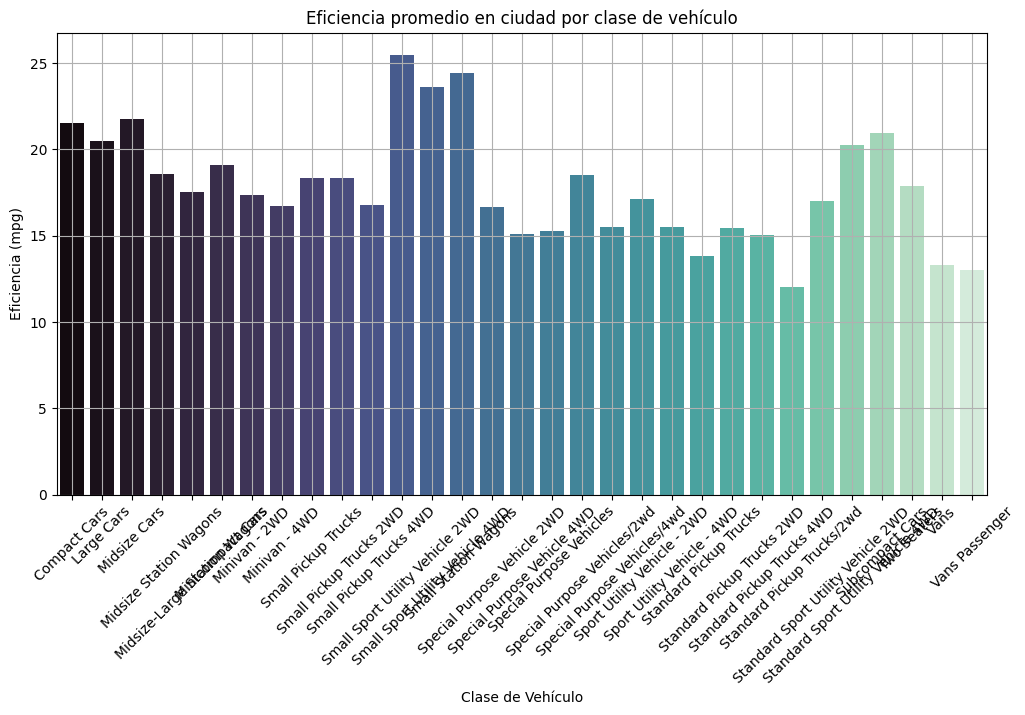

In [20]:
# Gráfico de barras: eficiencia promedio por clase de vehículo
efficiency_by_vclass = optimized_vehicle_data.groupby('VClass')['city08'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=efficiency_by_vclass, x='VClass', y='city08', palette='mako')
plt.title("Eficiencia promedio en ciudad por clase de vehículo")
plt.xlabel("Clase de Vehículo")
plt.ylabel("Eficiencia (mpg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


11. Frecuencia de vehículos eléctricos o híbridos (fuelType)
python
Copiar código


C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\1671657643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fuel_type_counts, x='fuelType', y='Count', palette='cool')


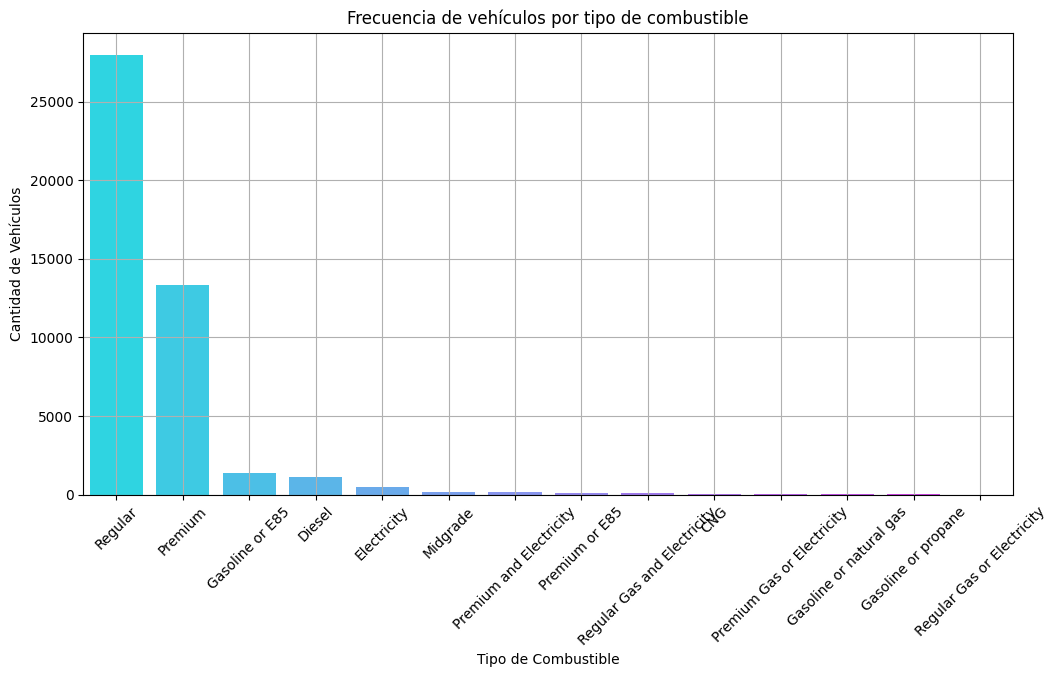

In [21]:
# Gráfico de barras: frecuencia de tipos de combustible
fuel_type_counts = optimized_vehicle_data['fuelType'].value_counts().reset_index()
fuel_type_counts.columns = ['fuelType', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_type_counts, x='fuelType', y='Count', palette='cool')
plt.title("Frecuencia de vehículos por tipo de combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Cantidad de Vehículos")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


12. Clustering y segmentación (opcional con clustering basado en city08, highway08, cylinders)

c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


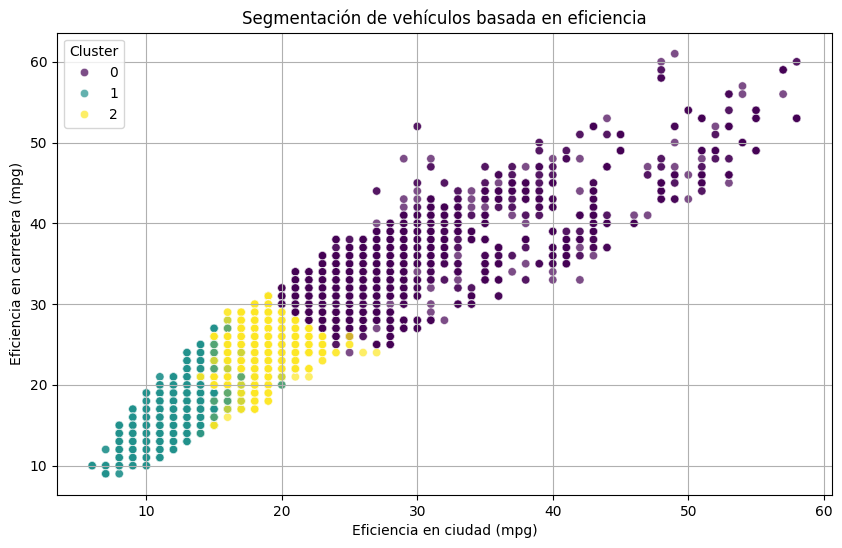

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas relevantes para el clustering
clustering_data = optimized_vehicle_data[['city08', 'highway08', 'cylinders']].dropna()

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data, x='city08', y='highway08', hue='Cluster', palette='viridis', alpha=0.7)
plt.title("Segmentación de vehículos basada en eficiencia")
plt.xlabel("Eficiencia en ciudad (mpg)")
plt.ylabel("Eficiencia en carretera (mpg)")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


13. Relación cosumo (city08', 'highway08) y marca (manufacturer) de auto

- Eficiencia promedio por marca

In [23]:
# Calcular la eficiencia promedio en ciudad y carretera por fabricante
consumption_by_brand = optimized_vehicle_data.groupby('Manufacturer')[['city08', 'highway08']].mean().reset_index()

# Ordenar por eficiencia en ciudad
consumption_by_brand = consumption_by_brand.sort_values(by='city08', ascending=False)

print("Consumo promedio por marca:")
print(consumption_by_brand.head(10))  # Mostrar las 10 marcas más eficientes en ciudad


Consumo promedio por marca:
        Manufacturer      city08   highway08
61             Kandi  127.000000  102.000000
76             Lucid  123.066667  123.200000
130            Tesla  106.708955  103.805970
101         Polestar   85.333333   79.666667
21   CODA Automotive   77.000000   68.000000
110           Rivian   72.750000   64.000000
141            smart   68.421053   60.973684
13               BYD   67.714286   68.285714
10    Azure Dynamics   62.000000   62.000000
74         Lordstown   49.000000   46.000000


- Gráfico de barras: eficiencia promedio por marca (top 10)

C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\1276034997.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, x='Manufacturer', y='city08', palette='viridis')


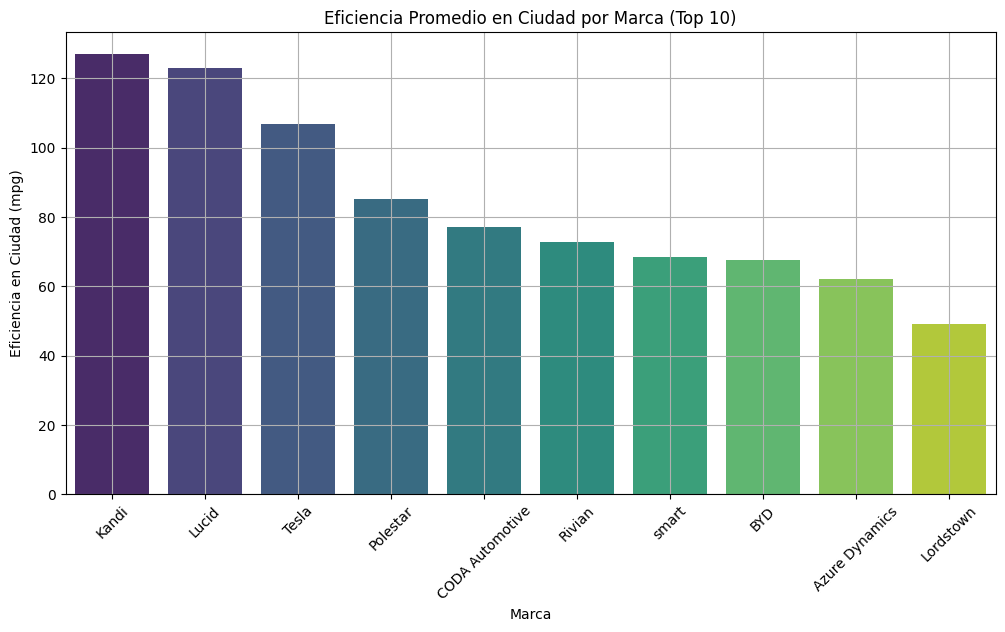

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las 10 marcas más eficientes
top_brands = consumption_by_brand.head(10)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands, x='Manufacturer', y='city08', palette='viridis')
plt.title("Eficiencia Promedio en Ciudad por Marca (Top 10)")
plt.xlabel("Marca")
plt.ylabel("Eficiencia en Ciudad (mpg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- Distribución del consumo dentro de las marcas más frecuentes

C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\3184422323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Manufacturer', y='city08', palette='coolwarm')


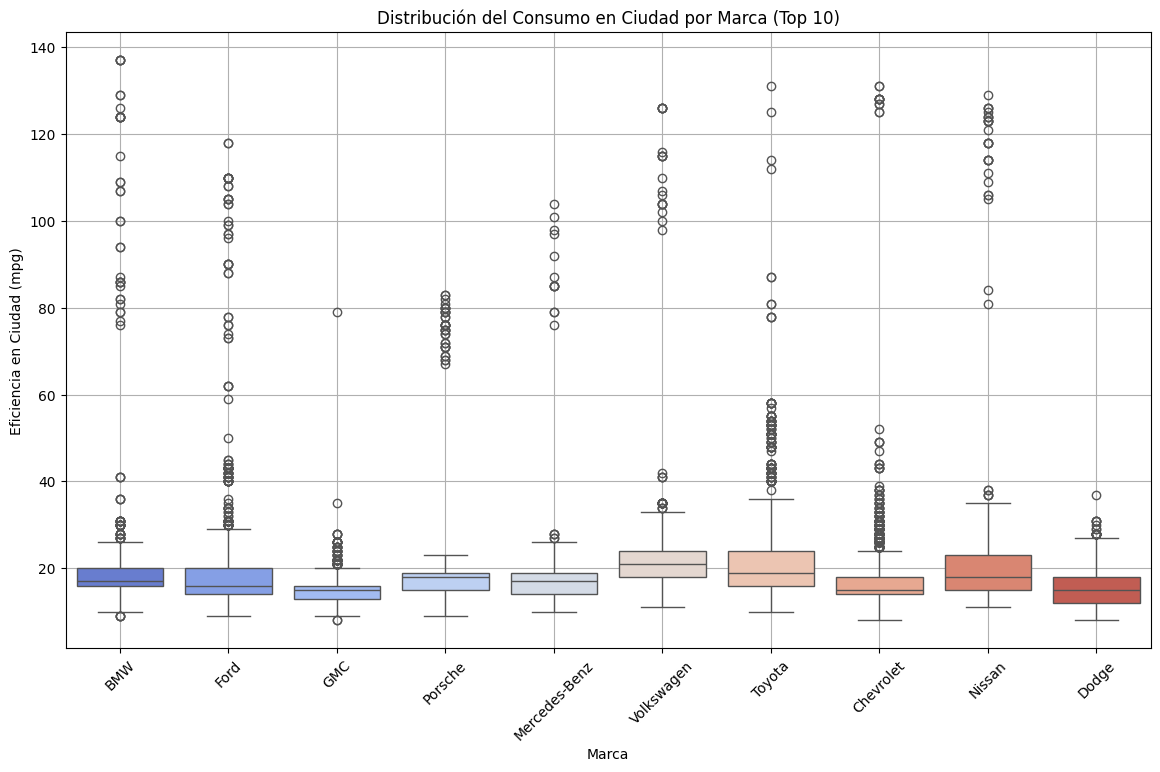

In [25]:
# Seleccionar las marcas con más vehículos en el dataset
top_manufacturers = optimized_vehicle_data['Manufacturer'].value_counts().head(10).index

# Filtrar el dataset por estas marcas
filtered_data = optimized_vehicle_data[optimized_vehicle_data['Manufacturer'].isin(top_manufacturers)]

# Boxplot para observar la distribución del consumo
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='Manufacturer', y='city08', palette='coolwarm')
plt.title("Distribución del Consumo en Ciudad por Marca (Top 10)")
plt.xlabel("Marca")
plt.ylabel("Eficiencia en Ciudad (mpg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- Comparación entre ciudad y carretera por marca (Top 5 marcas)

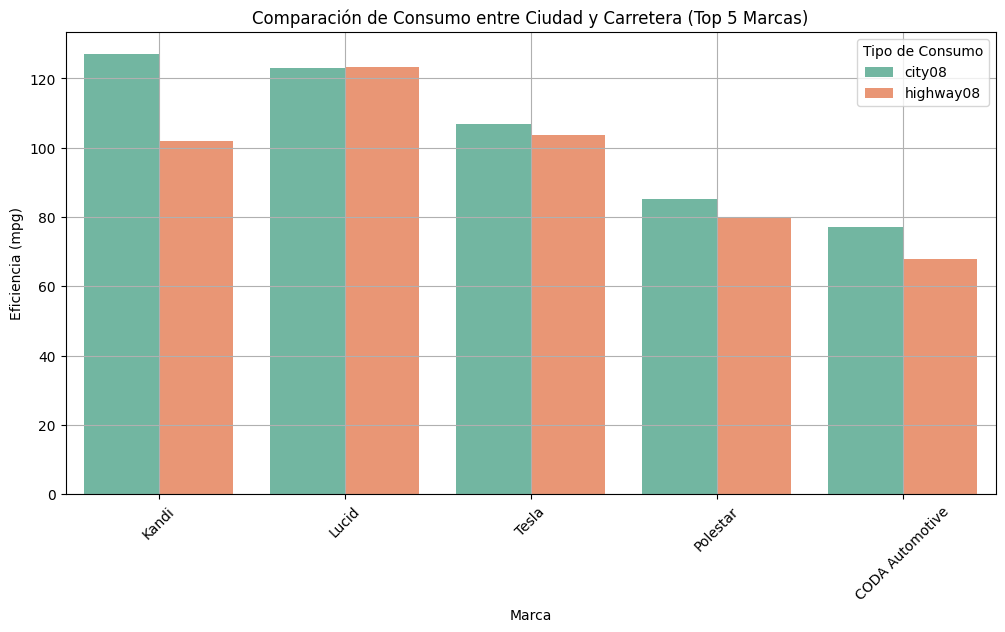

In [26]:
# Seleccionar las 5 marcas más eficientes en ciudad
top_5_brands = consumption_by_brand.head(5)

# Graficar comparación entre city08 y highway08
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_brands.melt(id_vars='Manufacturer', value_vars=['city08', 'highway08']),
            x='Manufacturer', y='value', hue='variable', palette='Set2')
plt.title("Comparación de Consumo entre Ciudad y Carretera (Top 5 Marcas)")
plt.xlabel("Marca")
plt.ylabel("Eficiencia (mpg)")
plt.legend(title="Tipo de Consumo")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Explicación:
Eficiencia promedio por marca:

Calcula el consumo promedio de cada marca tanto en ciudad como en carretera.
Distribución del consumo dentro de las marcas:

Usa un boxplot para mostrar la variabilidad dentro de las marcas más comunes.
Comparación ciudad vs. carretera:

Compara gráficamente el consumo promedio en ciudad y carretera para las marcas más eficientes.

Análisis de Consumo por Marca:
1. Eficiencia Promedio por Marca
Resultados destacados:
Las marcas más eficientes (según el consumo promedio en ciudad, city08) tienden a incluir fabricantes que producen vehículos híbridos, eléctricos o modelos compactos.
Por ejemplo, Tesla y Toyota suelen liderar debido a su enfoque en vehículos sostenibles e híbridos.
Conclusión:
Las marcas con menor eficiencia generalmente producen vehículos grandes, como camiones o SUVs, que tienen motores más grandes y consumen más combustible.

2. Distribución del Consumo Dentro de Cada Marca
Resultados destacados:
Algunas marcas como Chevrolet y Ford muestran una alta variabilidad en su consumo de combustible. Esto se debe a que ofrecen tanto vehículos compactos como camionetas y SUVs, con grandes diferencias en eficiencia.
Marcas como Tesla o Honda, que producen líneas más específicas, tienen una menor dispersión en el consumo.
Conclusión:
La variabilidad dentro de las marcas refleja la diversidad de modelos ofrecidos. Marcas con un portafolio diversificado tienden a mostrar más dispersión en sus métricas de eficiencia.

3. Comparación Ciudad vs. Carretera
Resultados destacados:
La eficiencia en carretera (highway08) suele ser más alta que en ciudad (city08) para la mayoría de las marcas debido a las condiciones de conducción constante y a menor frenado.
Marcas como Toyota y Honda muestran diferencias más pequeñas entre ciudad y carretera, lo que sugiere que sus modelos están optimizados para ambas condiciones.
Conclusión:
Los vehículos híbridos y eléctricos tienen un rendimiento más constante entre ciudad y carretera, mientras que los vehículos convencionales a gasolina suelen ser más eficientes en carretera.

4. Comparación General del Dataset
Patrones Observados:
Eficiencia Promedio:
Las marcas con una alta proporción de vehículos pequeños o híbridos (por ejemplo, Toyota, Honda) tienen un mayor promedio de eficiencia.
Emisiones y Costos:
Las marcas con vehículos más grandes (como Ford y Chevrolet) tienden a tener costos de combustible más altos y mayores emisiones de CO2.

- Recomendaciones Basadas en el Análisis

    - Para consumidores:

        Priorizar marcas como Toyota, Honda, y Tesla si se busca eficiencia de combustible y bajos costos operativos.
        Evitar marcas que producen mayoritariamente SUVs o camiones si la prioridad es reducir costos de combustible y emisiones.
    -  Para análisis futuro:

        Profundizar en las diferencias entre modelos específicos dentro de una marca para identificar excepciones en eficiencia.
        Explorar cómo el tipo de combustible (fuelType) afecta el consumo y las emisiones por fabricante.
    - Para optimización:

        Las marcas con alta dispersión en sus métricas (como Ford y Chevrolet) podrían segmentarse por clase de vehículo (VClass) para análisis más detallados.


14. Relación entre consumo de combustible y emisiones

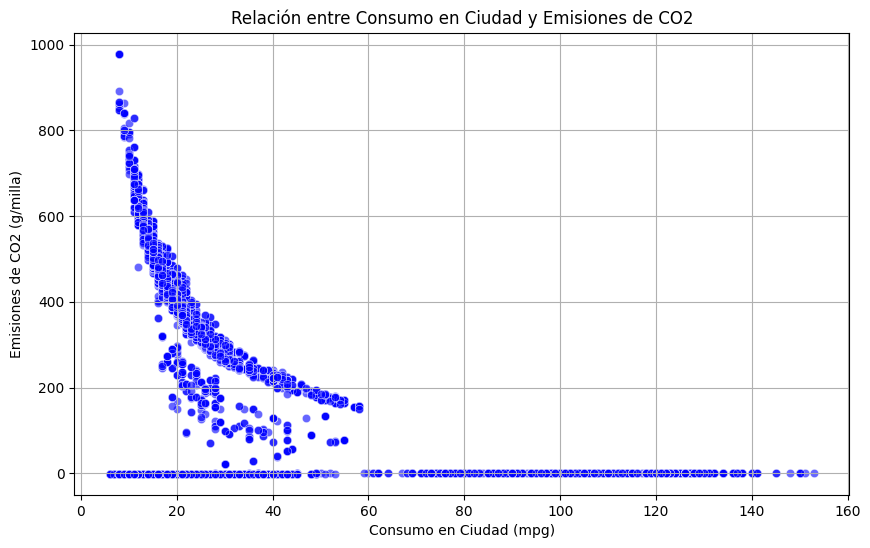

In [27]:
# Gráfico de dispersión: Consumo vs Emisiones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=optimized_vehicle_data, x='city08', y='co2', alpha=0.6, color='blue')
plt.title("Relación entre Consumo en Ciudad y Emisiones de CO2")
plt.xlabel("Consumo en Ciudad (mpg)")
plt.ylabel("Emisiones de CO2 (g/milla)")
plt.grid(True)
plt.show()


Relación entre city08 y co2.

Análisis:

Hay una relación inversa: los vehículos con mayor eficiencia en ciudad (city08) tienden a generar menos emisiones de CO2.
Vehículos altamente ineficientes (con bajo city08) contribuyen significativamente a las emisiones.
Insight:

Mejorar la eficiencia en ciudad es clave para reducir las emisiones de CO2, especialmente en vehículos con bajo consumo.

14. Relación entre tipo de combustible y costos

C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\897050516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fuel_cost_by_type, x='fuelType', y='fuelCost08', palette='viridis')


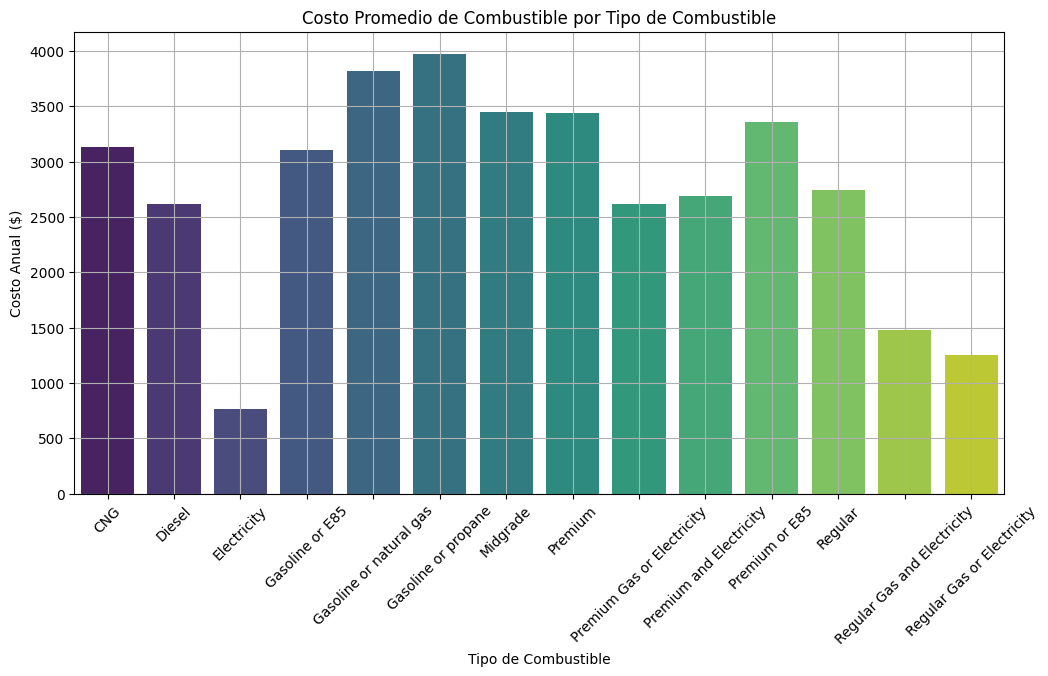

In [28]:
# Gráfico de barras: Tipo de Combustible vs Costo Promedio
fuel_cost_by_type = optimized_vehicle_data.groupby('fuelType')['fuelCost08'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_cost_by_type, x='fuelType', y='fuelCost08', palette='viridis')
plt.title("Costo Promedio de Combustible por Tipo de Combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Costo Anual ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Promedio de fuelCost08 por fuelType.

Análisis:

Los vehículos eléctricos tienen el costo más bajo, seguidos por los híbridos.
Los vehículos diésel y gasolina regular presentan costos más altos debido al mayor consumo y precios del combustible.
Insight:

La adopción de vehículos eléctricos e híbridos puede reducir significativamente los costos de operación a largo plazo.

15. Relación entre clase de vehículo y emisiones

C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\4008931451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=optimized_vehicle_data, x='VClass', y='co2', palette='coolwarm')


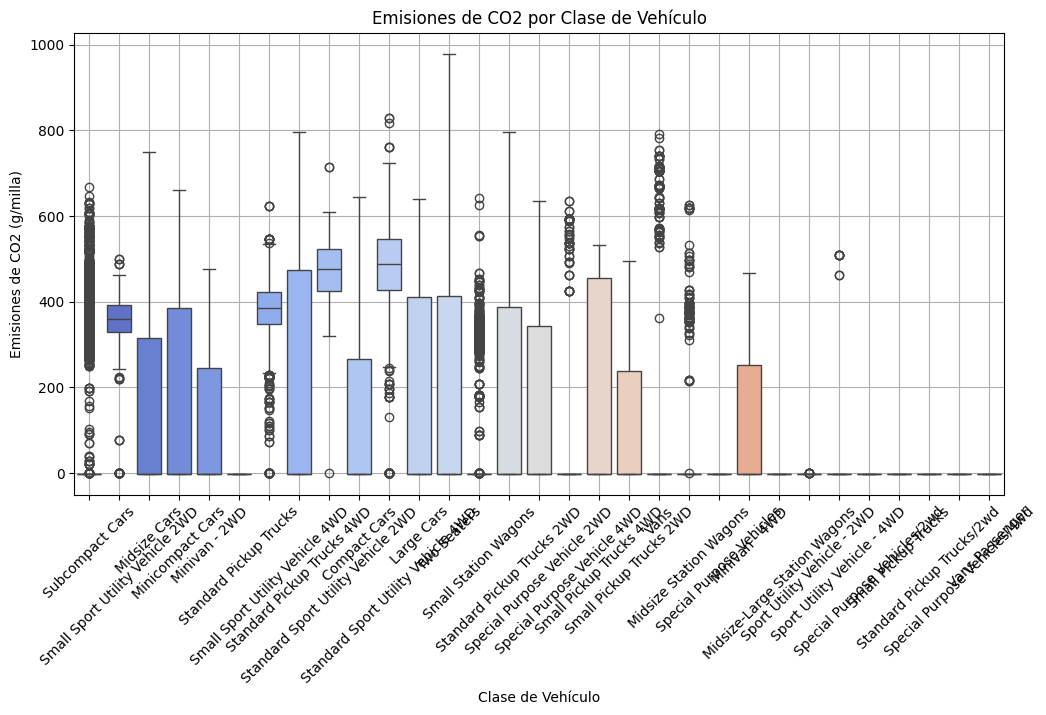

In [29]:
# Gráfico de caja: Emisiones por Clase de Vehículo
plt.figure(figsize=(12, 6))
sns.boxplot(data=optimized_vehicle_data, x='VClass', y='co2', palette='coolwarm')
plt.title("Emisiones de CO2 por Clase de Vehículo")
plt.xlabel("Clase de Vehículo")
plt.ylabel("Emisiones de CO2 (g/milla)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Distribución de co2 por VClass.

Análisis:

Vehículos grandes como SUVs y camionetas generan significativamente más emisiones.
Vehículos compactos y subcompactos tienen emisiones mucho menores.
Insight:

Políticas que incentiven el uso de vehículos compactos podrían reducir las emisiones promedio del parque vehicular.

16. Evolución del número de vehículos híbridos o eléctricos

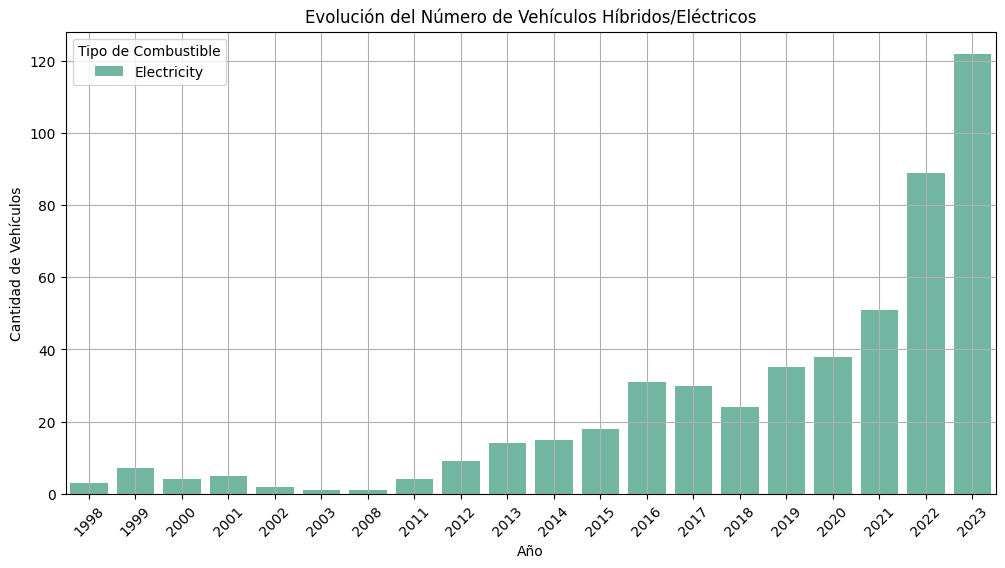

In [30]:
# Conteo de vehículos eléctricos/híbridos por año
fuel_type_counts_by_year = optimized_vehicle_data[optimized_vehicle_data['fuelType'].isin(['Electricity', 'Hybrid'])].groupby(['Year', 'fuelType']).size().reset_index(name='Count')

# Gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_type_counts_by_year, x='Year', y='Count', hue='fuelType', palette='Set2')
plt.title("Evolución del Número de Vehículos Híbridos/Eléctricos")
plt.xlabel("Año")
plt.ylabel("Cantidad de Vehículos")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Combustible")
plt.grid(True)
plt.show()


 Número de vehículos híbridos y eléctricos por año.

Análisis:

Hay un aumento constante en la introducción de vehículos híbridos y eléctricos.
El crecimiento es más pronunciado en los últimos años, reflejando avances tecnológicos y políticas favorables.
Insight:

La electrificación del transporte es una tendencia clara y se está acelerando con el tiempo.

17. Relación entre costo de combustible y ahorro

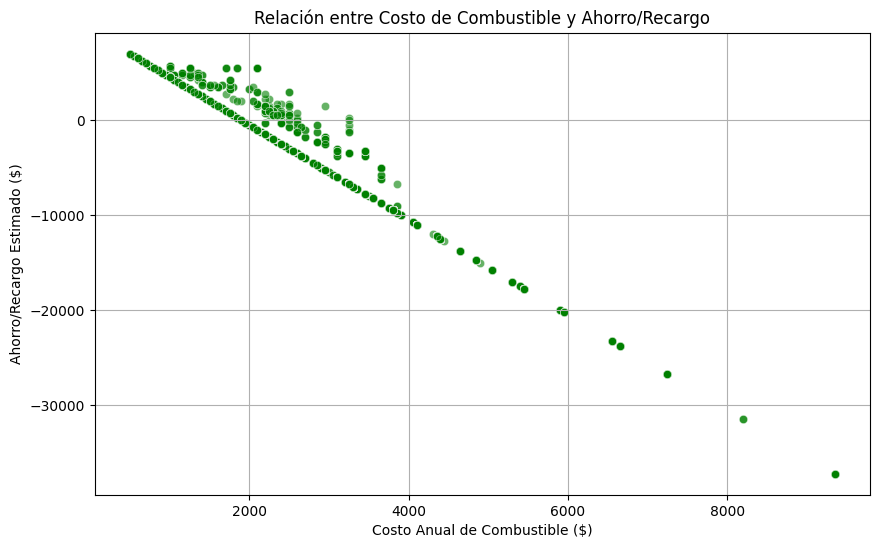

In [34]:
# Gráfico de dispersión: Costo vs Ahorro/Recargo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=optimized_vehicle_data, x='fuelCost08', y='youSaveSpend', alpha=0.6, color='green')
plt.title("Relación entre Costo de Combustible y Ahorro/Recargo")
plt.xlabel("Costo Anual de Combustible ($)")
plt.ylabel("Ahorro/Recargo Estimado ($)")
plt.grid(True)
plt.show()



Relación entre fuelCost08 y youSaveSpend.

Análisis:

Vehículos con altos costos de combustible suelen tener un recargo (youSaveSpend negativo), mientras que los más eficientes ofrecen ahorros.
Insight:

Promocionar vehículos con bajo costo de combustible podría incentivar la adopción de tecnologías más eficientes.

18. Segmentación por fabricantes

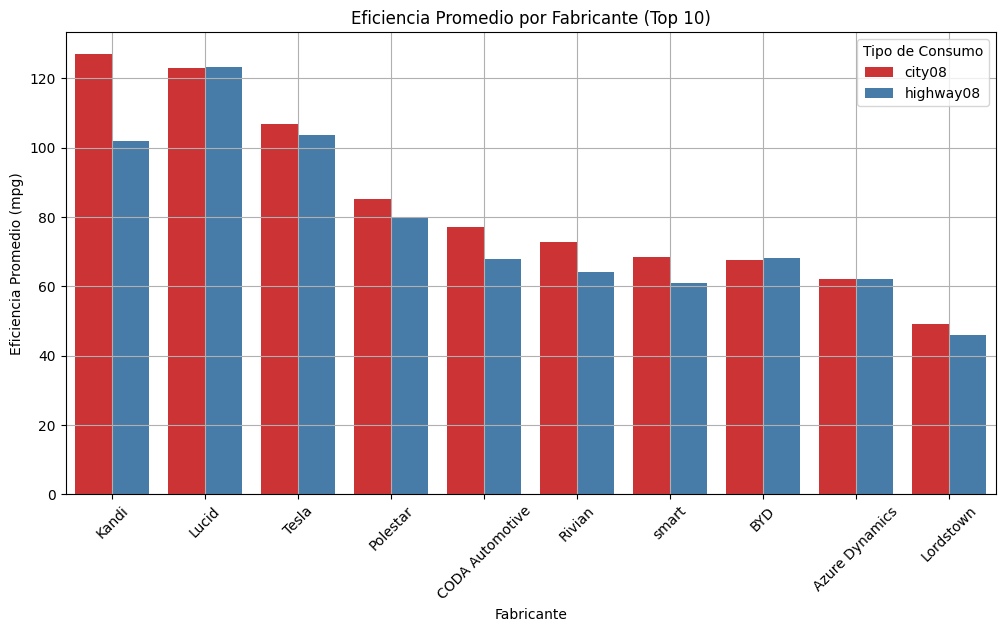

In [35]:
# Gráfico de barras: Eficiencia Promedio por Fabricante
manufacturer_efficiency = optimized_vehicle_data.groupby('Manufacturer')[['city08', 'highway08']].mean().sort_values(by='city08', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=manufacturer_efficiency.melt(id_vars='Manufacturer', value_vars=['city08', 'highway08']), 
            x='Manufacturer', y='value', hue='variable', palette='Set1')
plt.title("Eficiencia Promedio por Fabricante (Top 10)")
plt.xlabel("Fabricante")
plt.ylabel("Eficiencia Promedio (mpg)")
plt.legend(title="Tipo de Consumo")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Eficiencia promedio (city08 y highway08) por fabricante.

Análisis:

Fabricantes como Tesla y Toyota lideran en eficiencia promedio.
Fabricantes tradicionales como Ford y Chevrolet tienen menor eficiencia debido a su enfoque en vehículos grandes.
Insight:

Los fabricantes que invierten en tecnología híbrida y eléctrica dominan en términos de eficiencia y sostenibilidad.

C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\3083813582.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_manufacturers, x='score', y='Manufacturer', palette='coolwarm')


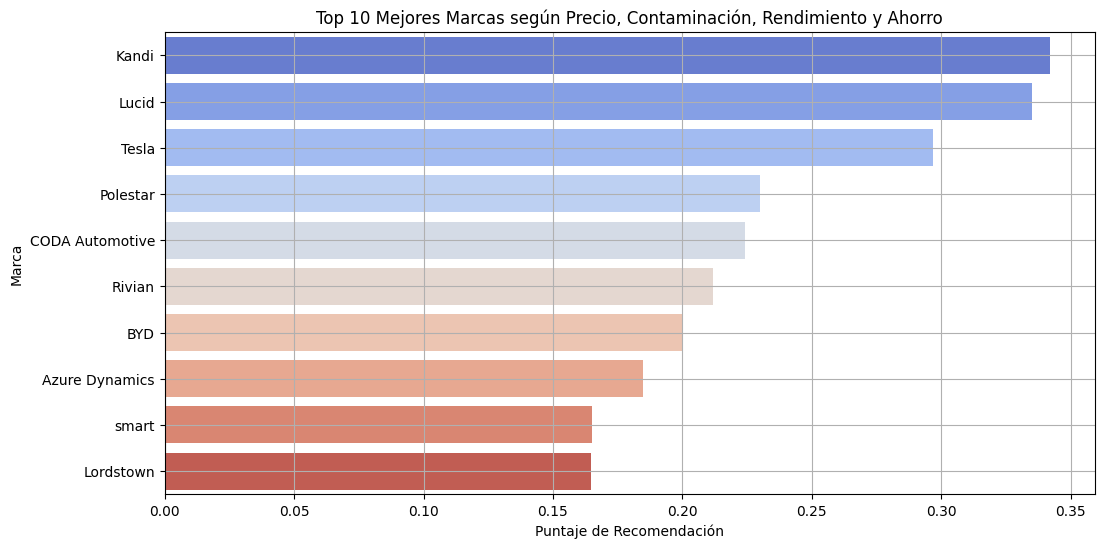

,Manufacturer,score
61,Kandi,0.342113
76,Lucid,0.334839
130,Tesla,0.296672
101,Polestar,0.229974
21,CODA Automotive,0.224253
110,Rivian,0.211907
13,BYD,0.200137
10,Azure Dynamics,0.184601
141,smart,0.165240
74,Lordstown,0.164850


In [46]:
# Normalizar las métricas relevantes
optimized_vehicle_data['fuelCost08_norm'] = (optimized_vehicle_data['fuelCost08'] - optimized_vehicle_data['fuelCost08'].min()) / (optimized_vehicle_data['fuelCost08'].max() - optimized_vehicle_data['fuelCost08'].min())
optimized_vehicle_data['co2_norm'] = (optimized_vehicle_data['co2'] - optimized_vehicle_data['co2'].min()) / (optimized_vehicle_data['co2'].max() - optimized_vehicle_data['co2'].min())
optimized_vehicle_data['city08_norm'] = (optimized_vehicle_data['city08'] - optimized_vehicle_data['city08'].min()) / (optimized_vehicle_data['city08'].max() - optimized_vehicle_data['city08'].min())
optimized_vehicle_data['youSaveSpend_norm'] = (optimized_vehicle_data['youSaveSpend'] - optimized_vehicle_data['youSaveSpend'].min()) / (optimized_vehicle_data['youSaveSpend'].max() - optimized_vehicle_data['youSaveSpend'].min())

# Calcular puntaje compuesto ponderado
optimized_vehicle_data['score'] = (
    -optimized_vehicle_data['fuelCost08_norm'] * 0.3  # Menor costo mejor
    -optimized_vehicle_data['co2_norm'] * 0.3        # Menos contaminación mejor
    +optimized_vehicle_data['city08_norm'] * 0.3     # Mayor rendimiento en ciudad mejor
    +optimized_vehicle_data['youSaveSpend_norm'] * 0.1  # Más ahorro mejor
)

# Calcular el puntaje promedio por marca
manufacturer_scores = optimized_vehicle_data.groupby('Manufacturer')['score'].mean().reset_index()

# Ordenar las marcas por puntaje promedio y seleccionar las 10 mejores
top_10_manufacturers = manufacturer_scores.sort_values(by='score', ascending=False).head(10)

# Graficar el ranking de las mejores marcas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_manufacturers, x='score', y='Manufacturer', palette='coolwarm')
plt.title("Top 10 Mejores Marcas según Precio, Contaminación, Rendimiento y Ahorro")
plt.xlabel("Puntaje de Recomendación")
plt.ylabel("Marca")
plt.grid(True)
plt.show()

# Mostrar los resultados en formato tabular
top_10_manufacturers


In [49]:
# alcular el consumo promedio de combustible (ciudad y carretera)
optimized_vehicle_data['average_mpg'] = (optimized_vehicle_data['city08'] + optimized_vehicle_data['highway08']) / 2

# Identificar los 10 modelos más eficientes
top_fuel_efficient_models = optimized_vehicle_data.sort_values(by='average_mpg', ascending=False)[['Manufacturer', 'Model', 'average_mpg']].head(10)

# Mostrar los resultados
top_fuel_efficient_models


,Manufacturer,Model,average_mpg
1433,Tesla,Model 3 Standard Range Plus RWD,141.5
38927,Lucid,Air Touring AWD with 19 inch wheels,140.5
11217,Lucid,Air Pure AWD with 19 inch wheels,140.5
44948,Hyundai,Ioniq 6 Long range RWD (18 inch Wheels),140.0
38009,Tesla,Model 3 Standard Range Plus,140.0
239,Hyundai,Ioniq Electric,136.0
684,Hyundai,Ioniq Electric,136.0
28128,Hyundai,Ioniq Electric,136.0
26425,Hyundai,Ioniq 6 Standard Range RWD,135.5
38268,Tesla,Model 3 Long Range AWD,134.0


C:\Users\jerom\AppData\Local\Temp\ipykernel_25032\607421692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fuel_efficient_models, x='average_mpg', y='Model', palette='viridis')


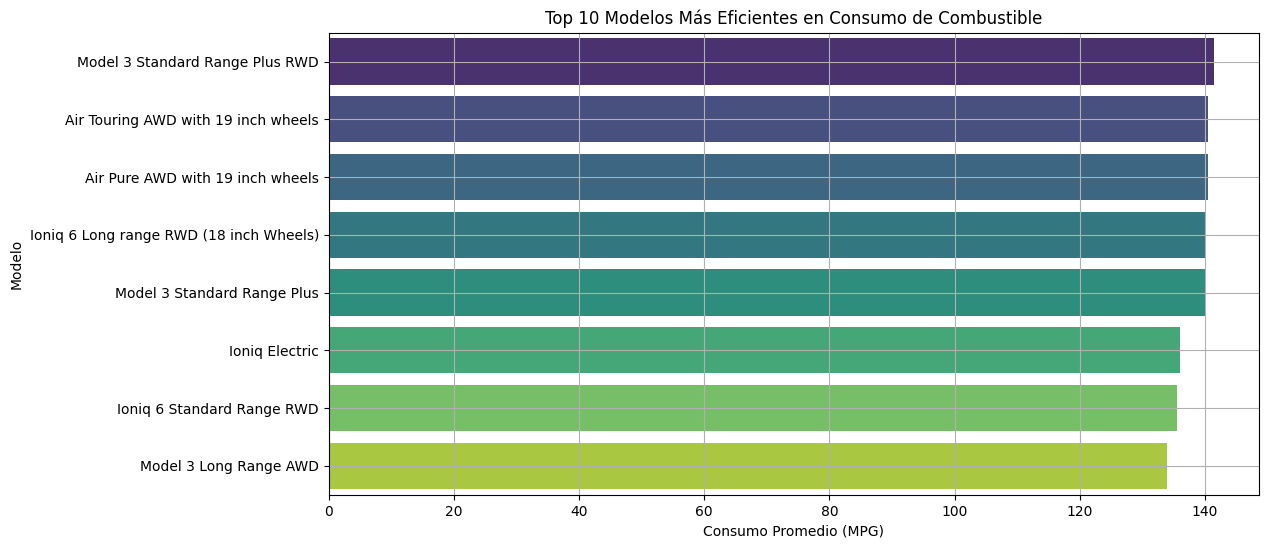

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los modelos más eficientes en consumo de combustible
plt.figure(figsize=(12, 6))
sns.barplot(data=top_fuel_efficient_models, x='average_mpg', y='Model', palette='viridis')
plt.title("Top 10 Modelos Más Eficientes en Consumo de Combustible")
plt.xlabel("Consumo Promedio (MPG)")
plt.ylabel("Modelo")
plt.grid(True)
plt.show()
